In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings ('ignore')
import os
os.getcwd()

'C:\\Users\\DELL\\Documents\\Python Codes\\LB Weekday Sept Classes 2022'

In [3]:
df = pd.read_excel ('Customer_Segment.xlsx')
df

,InvoiceNo,StockCode,lower,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,white hanging heart t-light holder,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,white metal lantern,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,cream cupid hearts coat hanger,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,knitted union flag hot water bottle,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,red woolly hottie white heart.,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,NaN,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,NaN,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,NaN,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,NaN,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


### Problem Statement :

#### 1) Segment (group / cluster) customer on basis of RFM (Recency, Frequency, Monetary).

#### 2) Segment (group / cluster) identify groups for (Day, Month, Season, Time) by invoice count.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   lower        1816 non-null    object        
 3   Description  540455 non-null  object        
 4   Quantity     541909 non-null  int64         
 5   InvoiceDate  541909 non-null  datetime64[ns]
 6   UnitPrice    541909 non-null  float64       
 7   CustomerID   406829 non-null  float64       
 8   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 37.2+ MB


In [5]:
df.nunique()

InvoiceNo      25900
StockCode       4070
lower            953
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

In [6]:
df1 = df.drop (['StockCode', 'Description', 'Country', 'lower'], axis = 1)

In [7]:
df1.isnull().sum()

InvoiceNo           0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
dtype: int64

In [8]:
df1.dropna (axis = 0, how = 'any', subset = ['CustomerID'], inplace = True)

In [9]:
df1.isnull().sum()

InvoiceNo      0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
dtype: int64

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   Quantity     406829 non-null  int64         
 2   InvoiceDate  406829 non-null  datetime64[ns]
 3   UnitPrice    406829 non-null  float64       
 4   CustomerID   406829 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 18.6+ MB


In [11]:
df1.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [12]:
df1 [df1 ['UnitPrice'] == 0]['UnitPrice'].count()

40

In [13]:
df1 [df1 ['UnitPrice'] == 0]

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID
9302,537197,1,2010-12-05 14:02:00,0.0,12647.0
33576,539263,4,2010-12-16 14:36:00,0.0,16560.0
40089,539722,10,2010-12-21 13:45:00,0.0,14911.0
47068,540372,24,2011-01-06 16:41:00,0.0,13081.0
47070,540372,24,2011-01-06 16:41:00,0.0,13081.0
56674,541109,1,2011-01-13 15:10:00,0.0,15107.0
86789,543599,16,2011-02-10 13:08:00,0.0,17560.0
130188,547417,36,2011-03-23 10:25:00,0.0,13239.0
139453,548318,5,2011-03-30 12:45:00,0.0,13113.0
145208,548871,2,2011-04-04 14:42:00,0.0,14410.0


In [14]:
df1 [df1 ['Quantity'] < 0]['Quantity'].count()

8905

In [15]:
df1 [df1 ['Quantity'] < 0]['UnitPrice'].min()

0.01

In [16]:
df1 [df1 ['Quantity'] < 0].value_counts()

InvoiceNo  Quantity  InvoiceDate          UnitPrice  CustomerID
C548460    -2        2011-03-31 11:58:00  7.95       16801.0       15
C575224    -100      2011-11-09 11:41:00  1.79       17511.0       14
C538341    -1        2010-12-10 14:03:00  3.75       15514.0       12
C570828    -6        2011-10-12 13:15:00  2.95       14911.0       11
C555636    -10       2011-06-06 12:33:00  1.25       15073.0       10
                                                                   ..
C551602    -6        2011-05-03 11:34:00  1.25       17692.0        1
C551588    -2        2011-05-03 11:28:00  0.85       12708.0        1
           -3        2011-05-03 11:28:00  2.95       12708.0        1
                                          0.85       12708.0        1
C581569    -1        2011-12-09 11:58:00  1.25       17315.0        1
Length: 7936, dtype: int64

In [17]:
df1 [df1 ['Quantity'] < -10000].value_counts()

InvoiceNo  Quantity  InvoiceDate          UnitPrice  CustomerID
C541433    -74215    2011-01-18 10:17:00  1.04       12346.0       1
C581484    -80995    2011-12-09 09:27:00  2.08       16446.0       1
dtype: int64

In [18]:
df1 [df1 ['Quantity'] < -2000].value_counts()

InvoiceNo  Quantity  InvoiceDate          UnitPrice  CustomerID
C536757    -9360     2010-12-02 14:23:00  0.03       15838.0       1
C541433    -74215    2011-01-18 10:17:00  1.04       12346.0       1
C550456    -3114     2011-04-18 13:08:00  2.10       15749.0       1
C581484    -80995    2011-12-09 09:27:00  2.08       16446.0       1
dtype: int64

In [19]:
df1 [df1 ['Quantity'] == -80995]

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID
540422,C581484,-80995,2011-12-09 09:27:00,2.08,16446.0


In [20]:
df1 ['Total'] = df1 ['Quantity'] * df1 ['UnitPrice']
df1.head()

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID,Total
0,536365,6,2010-12-01 08:26:00,2.55,17850.0,15.30
1,536365,6,2010-12-01 08:26:00,3.39,17850.0,20.34
2,536365,8,2010-12-01 08:26:00,2.75,17850.0,22.00
3,536365,6,2010-12-01 08:26:00,3.39,17850.0,20.34
4,536365,6,2010-12-01 08:26:00,3.39,17850.0,20.34


In [21]:
df1 = df1.drop (['Quantity', 'UnitPrice'], axis = 1)
df1.head()

,InvoiceNo,InvoiceDate,CustomerID,Total
0,536365,2010-12-01 08:26:00,17850.0,15.30
1,536365,2010-12-01 08:26:00,17850.0,20.34
2,536365,2010-12-01 08:26:00,17850.0,22.00
3,536365,2010-12-01 08:26:00,17850.0,20.34
4,536365,2010-12-01 08:26:00,17850.0,20.34


In [22]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   InvoiceDate  406829 non-null  datetime64[ns]
 2   CustomerID   406829 non-null  float64       
 3   Total        406829 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 15.5+ MB


In [23]:
df2 = df1.drop (['InvoiceDate', 'CustomerID'], axis = 1)
df2

,InvoiceNo,Total
0,536365,15.30
1,536365,20.34
2,536365,22.00
3,536365,20.34
4,536365,20.34
...,...,...
541904,581587,10.20
541905,581587,12.60
541906,581587,16.60
541907,581587,16.60


In [24]:
df2 = df2.groupby (['InvoiceNo']).sum()

In [25]:
df2.head()

,Total
InvoiceNo,
536365,139.12
536366,22.20
536367,278.73
536368,70.05
536369,17.85


In [26]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22190 entries, 536365 to C581569
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Total   22190 non-null  float64
dtypes: float64(1)
memory usage: 346.7+ KB


In [27]:
df2_final = df2.reset_index()
df2_final

,InvoiceNo,Total
0,536365,139.12
1,536366,22.20
2,536367,278.73
3,536368,70.05
4,536369,17.85
...,...,...
22185,C581484,-168469.60
22186,C581490,-32.53
22187,C581499,-224.69
22188,C581568,-54.75


In [28]:
df1 = df1.drop (['Total'], axis = 1)
df1.head()

,InvoiceNo,InvoiceDate,CustomerID
0,536365,2010-12-01 08:26:00,17850.0
1,536365,2010-12-01 08:26:00,17850.0
2,536365,2010-12-01 08:26:00,17850.0
3,536365,2010-12-01 08:26:00,17850.0
4,536365,2010-12-01 08:26:00,17850.0


In [29]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   InvoiceDate  406829 non-null  datetime64[ns]
 2   CustomerID   406829 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 12.4+ MB


In [30]:
df1_final = df1.drop_duplicates (subset = ['InvoiceNo'])
df1_final

,InvoiceNo,InvoiceDate,CustomerID
0,536365,2010-12-01 08:26:00,17850.0
7,536366,2010-12-01 08:28:00,17850.0
9,536367,2010-12-01 08:34:00,13047.0
21,536368,2010-12-01 08:34:00,13047.0
25,536369,2010-12-01 08:35:00,13047.0
...,...,...,...
541865,581583,2011-12-09 12:23:00,13777.0
541867,581584,2011-12-09 12:25:00,13777.0
541869,581585,2011-12-09 12:31:00,15804.0
541890,581586,2011-12-09 12:49:00,13113.0


In [31]:
df_final = pd.merge (df1_final, df2_final, how = 'left', on = 'InvoiceNo')
df_final

,InvoiceNo,InvoiceDate,CustomerID,Total
0,536365,2010-12-01 08:26:00,17850.0,139.12
1,536366,2010-12-01 08:28:00,17850.0,22.20
2,536367,2010-12-01 08:34:00,13047.0,278.73
3,536368,2010-12-01 08:34:00,13047.0,70.05
4,536369,2010-12-01 08:35:00,13047.0,17.85
...,...,...,...,...
22185,581583,2011-12-09 12:23:00,13777.0,124.60
22186,581584,2011-12-09 12:25:00,13777.0,140.64
22187,581585,2011-12-09 12:31:00,15804.0,329.05
22188,581586,2011-12-09 12:49:00,13113.0,339.20


In [32]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22190 entries, 0 to 22189
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    22190 non-null  object        
 1   InvoiceDate  22190 non-null  datetime64[ns]
 2   CustomerID   22190 non-null  float64       
 3   Total        22190 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 866.8+ KB


In [33]:
df_final [df_final ['CustomerID'] == 12346]

,InvoiceNo,InvoiceDate,CustomerID,Total
2331,541431,2011-01-18 10:01:00,12346.0,77183.6
2333,C541433,2011-01-18 10:17:00,12346.0,-77183.6


In [34]:
max (df_final ['InvoiceDate'])

Timestamp('2011-12-09 12:50:00')

In [35]:
min (df_final ['InvoiceDate'])

Timestamp('2010-12-01 08:26:00')

In [36]:
import datetime as dt
latest_date = dt.datetime (2011, 12, 11)
latest_date

datetime.datetime(2011, 12, 11, 0, 0)

In [37]:
df_final.head()

,InvoiceNo,InvoiceDate,CustomerID,Total
0,536365,2010-12-01 08:26:00,17850.0,139.12
1,536366,2010-12-01 08:28:00,17850.0,22.20
2,536367,2010-12-01 08:34:00,13047.0,278.73
3,536368,2010-12-01 08:34:00,13047.0,70.05
4,536369,2010-12-01 08:35:00,13047.0,17.85


In [38]:
# keeping reference as customer id

#Recency info are obtained from the difference between last invoice date and the 
#latest Date(Dec 10,2011)
# frequency is counting of invoice no.
#Monetary is sum of total.


In [39]:
RFM_score = df_final.groupby ('CustomerID').agg ({'InvoiceDate' : lambda x : (latest_date-x.max()).days, 
                                                  'InvoiceNo' : lambda x : x.count(),
                                                  'Total' : lambda x : x.sum()})

In [40]:
RFM_score.head()

,InvoiceDate,InvoiceNo,Total
CustomerID,,,
12346.0,326,2,0.00
12347.0,3,7,4310.00
12348.0,76,4,1797.24
12349.0,19,1,1757.55
12350.0,311,1,334.40


In [41]:
RFM_score = RFM_score.reset_index()
RFM_score.head()

,CustomerID,InvoiceDate,InvoiceNo,Total
0,12346.0,326,2,0.00
1,12347.0,3,7,4310.00
2,12348.0,76,4,1797.24
3,12349.0,19,1,1757.55
4,12350.0,311,1,334.40


In [42]:
RFM_score = RFM_score.rename (columns = {'InvoiceDate' : 'Recency', 'InvoiceNo' : 'Frequency', 'Total' : 'Monetary'})
RFM_score

,CustomerID,Recency,Frequency,Monetary
0,12346.0,326,2,0.00
1,12347.0,3,7,4310.00
2,12348.0,76,4,1797.24
3,12349.0,19,1,1757.55
4,12350.0,311,1,334.40
...,...,...,...,...
4367,18280.0,278,1,180.60
4368,18281.0,181,1,80.82
4369,18282.0,8,3,176.60
4370,18283.0,4,16,2094.88


In [43]:
RFM_score [RFM_score ['CustomerID'] == 12346]

,CustomerID,Recency,Frequency,Monetary
0,12346.0,326,2,0.0


In [44]:
RFM_score [RFM_score ['Monetary'] < 0]

,CustomerID,Recency,Frequency,Monetary
125,12503.0,338,1,-1126.00
127,12505.0,302,1,-4.50
212,12605.0,366,1,-7.50
264,12666.0,360,1,-227.44
415,12870.0,367,1,-14.90
467,12943.0,302,1,-3.75
619,13154.0,145,1,-611.86
991,13672.0,302,6,-71.46
1004,13693.0,326,2,-32.00
1106,13829.0,360,1,-102.00


In [45]:
# Removing negative monetary rows :

In [46]:
RFM_score = RFM_score [RFM_score ['Monetary'] > 0]
RFM_score.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4319 entries, 1 to 4371
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  4319 non-null   float64
 1   Recency     4319 non-null   int64  
 2   Frequency   4319 non-null   int64  
 3   Monetary    4319 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 168.7 KB


In [47]:
RFM_score [RFM_score ['Monetary'] == 0].count()

CustomerID    0
Recency       0
Frequency     0
Monetary      0
dtype: int64

#### Frequency :

In [48]:
RFM_score

,CustomerID,Recency,Frequency,Monetary
1,12347.0,3,7,4310.00
2,12348.0,76,4,1797.24
3,12349.0,19,1,1757.55
4,12350.0,311,1,334.40
5,12352.0,37,11,1545.41
...,...,...,...,...
4367,18280.0,278,1,180.60
4368,18281.0,181,1,80.82
4369,18282.0,8,3,176.60
4370,18283.0,4,16,2094.88


In [49]:
RFM_score.tail (100)

,CustomerID,Recency,Frequency,Monetary
4269,18150.0,33,3,566.58
4270,18151.0,135,2,653.35
4271,18154.0,4,2,399.19
4272,18155.0,76,4,347.82
4273,18156.0,13,2,734.94
...,...,...,...,...
4367,18280.0,278,1,180.60
4368,18281.0,181,1,80.82
4369,18282.0,8,3,176.60
4370,18283.0,4,16,2094.88


In [50]:
RFM_score = RFM_score.reset_index (drop = True)
RFM_score

,CustomerID,Recency,Frequency,Monetary
0,12347.0,3,7,4310.00
1,12348.0,76,4,1797.24
2,12349.0,19,1,1757.55
3,12350.0,311,1,334.40
4,12352.0,37,11,1545.41
...,...,...,...,...
4314,18280.0,278,1,180.60
4315,18281.0,181,1,80.82
4316,18282.0,8,3,176.60
4317,18283.0,4,16,2094.88


#### Recency :

<AxesSubplot:xlabel='Recency', ylabel='Density'>

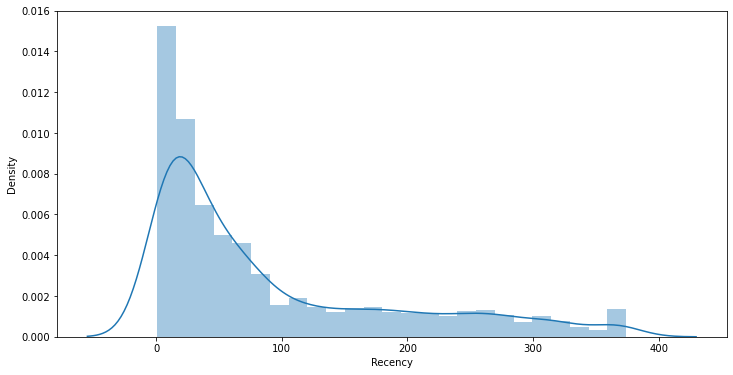

In [51]:
plt.figure (figsize = (12, 6))
sns.distplot (RFM_score ['Recency'], kde = True)

[Text(0.5, 0, 'Recency')]

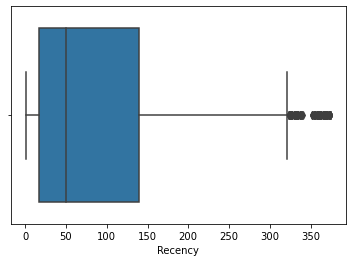

In [52]:
sns.boxplot (RFM_score ['Recency']).set (xlabel = 'Recency')

<AxesSubplot:xlabel='Recency', ylabel='count'>

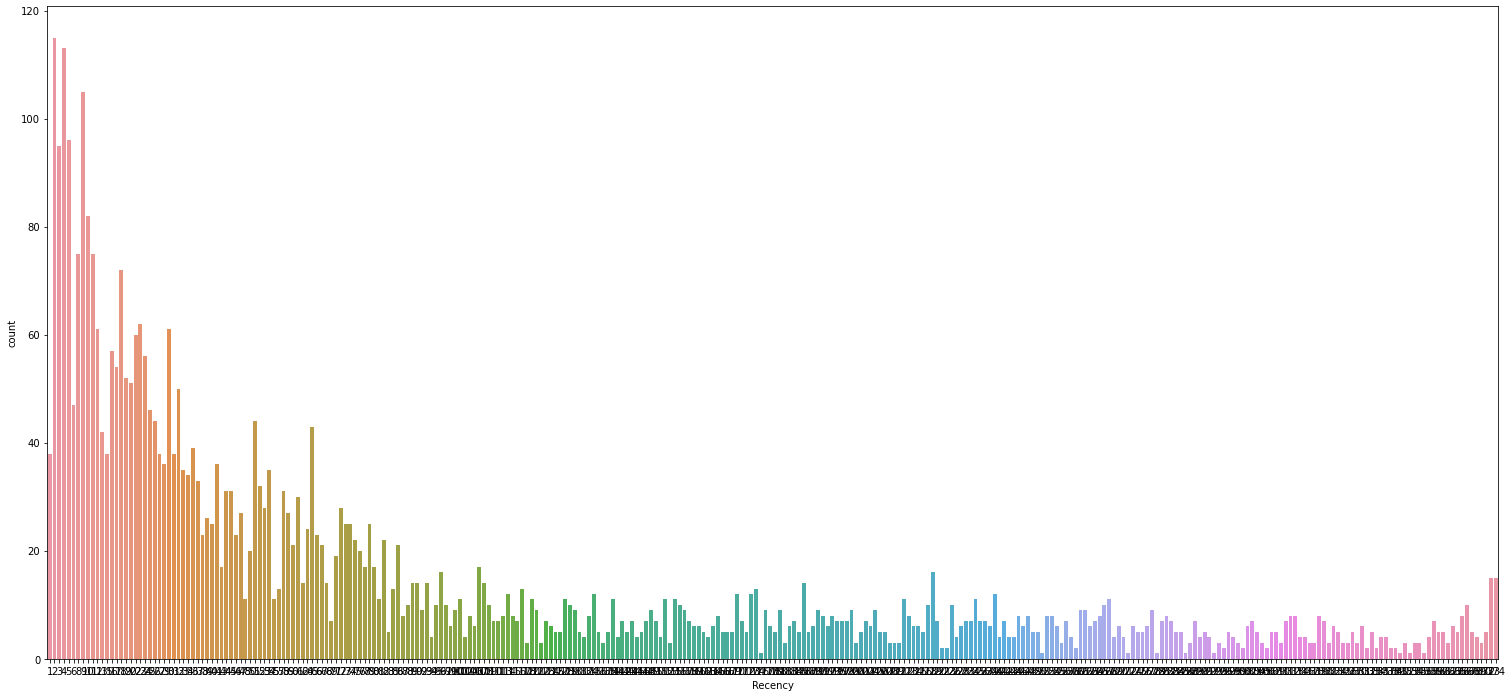

In [53]:
plt.figure (figsize = (26, 12))
sns.countplot (x = RFM_score ['Recency'])

In [54]:
from datetime import datetime, timedelta

In [55]:
RFM_score ['Recency'].quantile (q = [0.25, 0.5, 0.75])

0.25     17.0
0.50     50.0
0.75    139.0
Name: Recency, dtype: float64

In [56]:
RFM_score ['Recency'].quantile (q = [0.35, 0.55, 0.74])

0.35     26.0
0.55     59.0
0.74    131.0
Name: Recency, dtype: float64

<AxesSubplot:xlabel='Recency', ylabel='Proportion'>

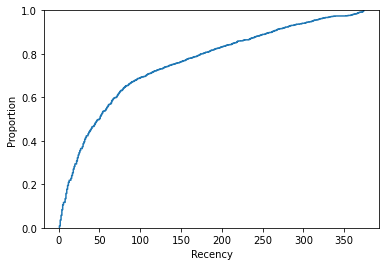

In [57]:
sns.ecdfplot (data = RFM_score ['Recency'])

#### Frequency :

<AxesSubplot:xlabel='Frequency', ylabel='Density'>

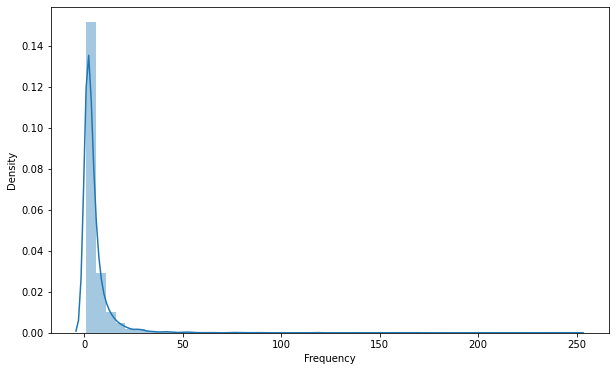

In [58]:
plt.figure (figsize = (10, 6))
sns.distplot (RFM_score ['Frequency'], kde = True)

[Text(0.5, 0, 'Frequency')]

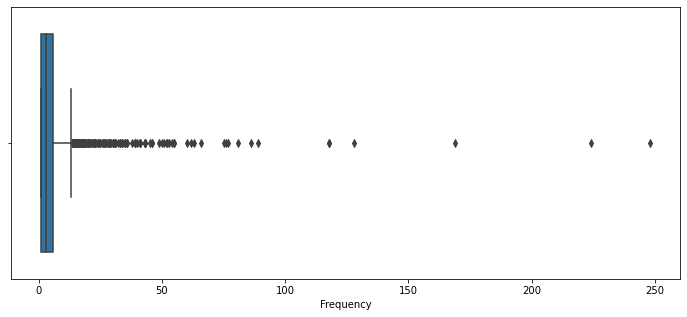

In [59]:
plt.figure (figsize = (12, 5))
sns.boxplot (RFM_score ['Frequency']).set (xlabel = 'Frequency')

<AxesSubplot:xlabel='Frequency', ylabel='count'>

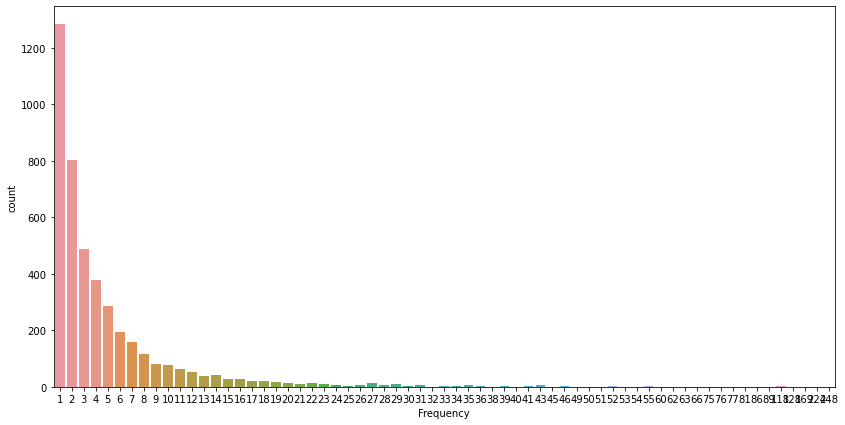

In [60]:
plt.figure (figsize = (14, 7))
sns.countplot (x = RFM_score ['Frequency'])

In [61]:
RFM_score ['Frequency'].quantile (q = [0.25, 0.5, 0.75])

0.25    1.0
0.50    3.0
0.75    6.0
Name: Frequency, dtype: float64

<AxesSubplot:xlabel='Frequency', ylabel='Proportion'>

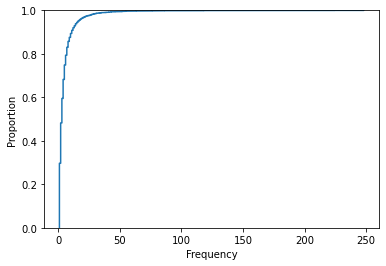

In [62]:
sns.ecdfplot (data = RFM_score ['Frequency'])

In [63]:
# Almost 80 % data has frequency 1 or 2.

In [64]:
boundaries_F = RFM_score ['Frequency'].quantile (q = [0.98, 0.995, 0.998])
boundaries_F

0.980    27.000
0.995    52.000
0.998    78.456
Name: Frequency, dtype: float64

<AxesSubplot:xlabel='Frequency', ylabel='Proportion'>

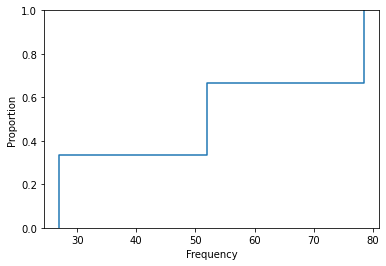

In [65]:
sns.ecdfplot (data = boundaries_F)

#### Monetary :

<AxesSubplot:xlabel='Monetary', ylabel='Density'>

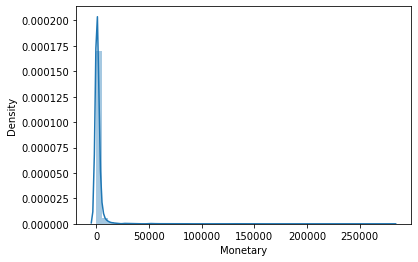

In [66]:
sns.distplot (RFM_score ['Monetary'], kde = True)

[Text(0.5, 0, 'Monetary')]

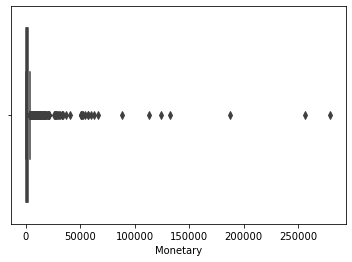

In [67]:
sns.boxplot (RFM_score ['Monetary']).set (xlabel = 'Monetary')

<AxesSubplot:xlabel='Monetary', ylabel='Proportion'>

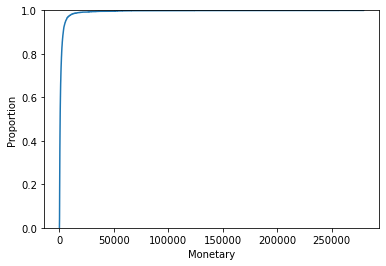

In [68]:
sns.ecdfplot (data = RFM_score ['Monetary'])

In [69]:
print ('Min : ', min (RFM_score ['Monetary']))
print ('Max : ', max (RFM_score ['Monetary']))

Min :  5.684341886080802e-14
Max :  279489.01999999996


In [70]:
boundaries_M = RFM_score ['Monetary'].quantile (q = [0.65, 0.95, 0.998])
boundaries_M

0.650     1097.90200
0.950     5665.07800
0.998    60596.42864
Name: Monetary, dtype: float64

<AxesSubplot:xlabel='Monetary', ylabel='Proportion'>

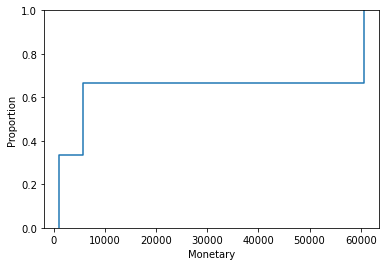

In [71]:
sns.ecdfplot (data = boundaries_M)

In [72]:
quantile100 = RFM_score.quantile (q = [0.30, 0.53, 0.767])
quantile200 = RFM_score.quantile (q = [0.98, 0.995, 0.998])
quantile300 = RFM_score.quantile (q = [0.65, 0.95, 0.998])

In [73]:
# Assigning RFM scores to customers :

In [74]:
def R_Scoring (x, p, d):
    if x <= d[p][0.30]:
        return 4
    elif x <= d[p][0.53]:
        return 3
    elif x <= d[p][0.767]:
        return 2
    else:
        return 1

In [75]:
def F_Scoring (x, p, d):
    if x<=d[p][0.98]:
        return 1
    elif x<=d[p][0.995]:
        return 2
    elif x<=d[p][0.998]:
        return 3
    else:
        return 4

In [76]:
def M_Scoring (x, p, d):
    if x<=d[p][0.65]:
        return 1
    elif x<=d[p][0.95]:
        return 2
    elif x<=d[p][0.998]:
        return 3
    else:
        return 4

In [77]:
RFM_score ['R'] = RFM_score ['Recency'].apply (R_Scoring, args = ('Recency', quantile100,))
RFM_score ['F'] = RFM_score ['Frequency'].apply (F_Scoring, args = ('Frequency', quantile200,))
RFM_score ['M'] = RFM_score ['Monetary'].apply (M_Scoring, args = ('Monetary', quantile300,))

In [78]:
RFM_score.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M
0,12347.0,3,7,4310.00,4,1,2
1,12348.0,76,4,1797.24,2,1,2
2,12349.0,19,1,1757.55,4,1,2
3,12350.0,311,1,334.40,1,1,1
4,12352.0,37,11,1545.41,3,1,2


In [79]:
RFM_score ['RFM_ID'] = RFM_score.R.map(str) + RFM_score.F.map(str) + RFM_score.M.map(str)

In [80]:
RFM_score.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_ID
0,12347.0,3,7,4310.00,4,1,2,412
1,12348.0,76,4,1797.24,2,1,2,212
2,12349.0,19,1,1757.55,4,1,2,412
3,12350.0,311,1,334.40,1,1,1,111
4,12352.0,37,11,1545.41,3,1,2,312


In [81]:
RFM_score ['RFM_Sum'] = RFM_score [['R', 'F', 'M']].sum (axis = 1)

In [82]:
RFM_score.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_ID,RFM_Sum
0,12347.0,3,7,4310.00,4,1,2,412,7
1,12348.0,76,4,1797.24,2,1,2,212,5
2,12349.0,19,1,1757.55,4,1,2,412,7
3,12350.0,311,1,334.40,1,1,1,111,3
4,12352.0,37,11,1545.41,3,1,2,312,6


In [83]:
loyalty_level = ['Silver', 'Gold', 'Diamond', 'Platinum']

In [84]:
RFM_score.RFM_Sum.unique()

array([ 7,  5,  3,  6,  8,  4,  9, 11, 10, 12], dtype=int64)

In [85]:
RFM_score.RFM_ID.unique()

array(['412', '212', '111', '312', '313', '413', '211', '411', '311',
       '112', '213', '314', '423', '422', '113', '443', '434', '433',
       '444', '333', '424', '122'], dtype=object)

In [86]:
score_cuts = pd.qcut (RFM_score.RFM_Sum, q = 4, labels = loyalty_level)
score_cuts

0       Platinum
1           Gold
2       Platinum
3         Silver
4        Diamond
          ...   
4314      Silver
4315      Silver
4316     Diamond
4317    Platinum
4318     Diamond
Name: RFM_Sum, Length: 4319, dtype: category
Categories (4, object): ['Silver' < 'Gold' < 'Diamond' < 'Platinum']

In [87]:
def R_Scoring_1 (x, p):
    if x <= p[0.30]:
        return 4
    elif x <= p[0.53]:
        return 3
    elif x <= p[0.767]:
        return 2
    else:
        return 1

In [88]:
RFM_score.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_ID,RFM_Sum
0,12347.0,3,7,4310.00,4,1,2,412,7
1,12348.0,76,4,1797.24,2,1,2,212,5
2,12349.0,19,1,1757.55,4,1,2,412,7
3,12350.0,311,1,334.40,1,1,1,111,3
4,12352.0,37,11,1545.41,3,1,2,312,6


In [89]:
RFM_score ['RFM_loyalty'] = score_cuts.values

In [90]:
RFM_score.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_ID,RFM_Sum,RFM_loyalty
0,12347.0,3,7,4310.00,4,1,2,412,7,Platinum
1,12348.0,76,4,1797.24,2,1,2,212,5,Gold
2,12349.0,19,1,1757.55,4,1,2,412,7,Platinum
3,12350.0,311,1,334.40,1,1,1,111,3,Silver
4,12352.0,37,11,1545.41,3,1,2,312,6,Diamond


In [91]:
RFM_score ['RFM_loyalty'].value_counts()

Silver      1728
Diamond      890
Gold         877
Platinum     824
Name: RFM_loyalty, dtype: int64

In [92]:
df_final.head()

,InvoiceNo,InvoiceDate,CustomerID,Total
0,536365,2010-12-01 08:26:00,17850.0,139.12
1,536366,2010-12-01 08:28:00,17850.0,22.20
2,536367,2010-12-01 08:34:00,13047.0,278.73
3,536368,2010-12-01 08:34:00,13047.0,70.05
4,536369,2010-12-01 08:35:00,13047.0,17.85


In [93]:
import datetime as dt
df_final ['Day'] = df_final ['InvoiceDate'].dt.day_name()
df_final

,InvoiceNo,InvoiceDate,CustomerID,Total,Day
0,536365,2010-12-01 08:26:00,17850.0,139.12,Wednesday
1,536366,2010-12-01 08:28:00,17850.0,22.20,Wednesday
2,536367,2010-12-01 08:34:00,13047.0,278.73,Wednesday
3,536368,2010-12-01 08:34:00,13047.0,70.05,Wednesday
4,536369,2010-12-01 08:35:00,13047.0,17.85,Wednesday
...,...,...,...,...,...
22185,581583,2011-12-09 12:23:00,13777.0,124.60,Friday
22186,581584,2011-12-09 12:25:00,13777.0,140.64,Friday
22187,581585,2011-12-09 12:31:00,15804.0,329.05,Friday
22188,581586,2011-12-09 12:49:00,13113.0,339.20,Friday


In [94]:
df_final ['Day'].value_counts()

Thursday     4978
Wednesday    4110
Tuesday      3892
Monday       3512
Friday       3356
Sunday       2342
Name: Day, dtype: int64

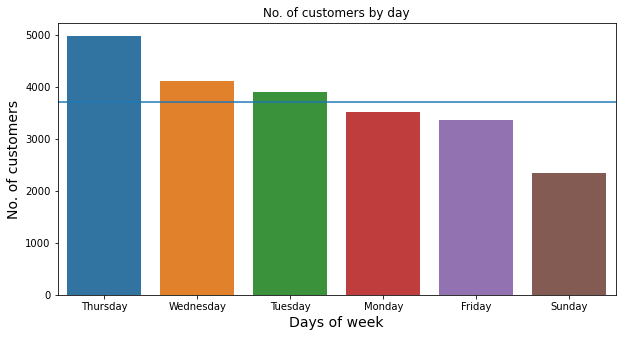

In [95]:
day = df_final ['Day'].value_counts()
plt.figure (figsize = (10, 5))
sns.barplot (day.index, day.values)
plt.axhline (y = day.mean())
plt.title ('No. of customers by day')
plt.ylabel ('No. of customers', fontsize = 14)
plt.xlabel ('Days of week', fontsize = 14)
plt.show()

([<matplotlib.patches.Wedge at 0x12bef7d8370>,
 [Text(0.8379365823613588, 0.7126445705543303, 'Thursday'),
  Text(-0.4491642944511584, 1.0041172424523908, 'Wednesday'),
  Text(-1.0998359201906365, 0.01899864885764472, 'Tuesday'),
  Text(-0.5653919039502078, -0.9435740537697924, 'Monday'),
  Text(0.4610737321216075, -0.9987046678310122, 'Friday'),
  Text(1.0400845304478459, -0.3580840257859659, 'Sunday')],
 [Text(0.4570563176516502, 0.38871522030236194, '22.43%'),
  Text(-0.24499870606426818, 0.5477003140649404, '18.52%'),
  Text(-0.5999105019221653, 0.01036289937689712, '17.54%'),
  Text(-0.30839558397284056, -0.5146767566017049, '15.83%'),
  Text(0.2514947629754222, -0.5447480006350975, '15.12%'),
  Text(0.567318834789734, -0.1953185595196177, '10.55%')])

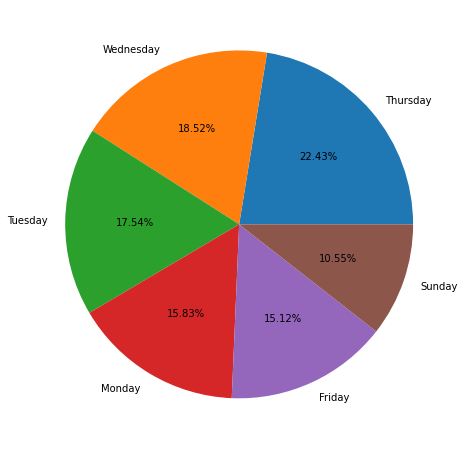

In [99]:
# Creating Pie Plot :

labels3 = ['Thursday', 'Wednesday', 'Tuesday', 'Monday', 'Friday', 'Sunday']
plt.figure (figsize = (10, 8))
plt.pie (df_final ['Day'].value_counts(), labels = labels3, autopct = '%0.2f%%')


In [96]:
# Extraction of MONTH from invoicedate
df_final ['Month'] = df_final ['InvoiceDate'].dt.month
df_final.head()

,InvoiceNo,InvoiceDate,CustomerID,Total,Day,Month
0,536365,2010-12-01 08:26:00,17850.0,139.12,Wednesday,12
1,536366,2010-12-01 08:28:00,17850.0,22.20,Wednesday,12
2,536367,2010-12-01 08:34:00,13047.0,278.73,Wednesday,12
3,536368,2010-12-01 08:34:00,13047.0,70.05,Wednesday,12
4,536369,2010-12-01 08:35:00,13047.0,17.85,Wednesday,12


In [98]:
# Extraction of HOUR from invoicedate
df_final ['Hour'] = df_final ['InvoiceDate'].dt.hour
df_final.head()

,InvoiceNo,InvoiceDate,CustomerID,Total,Day,Month,Hour
0,536365,2010-12-01 08:26:00,17850.0,139.12,Wednesday,12,8
1,536366,2010-12-01 08:28:00,17850.0,22.20,Wednesday,12,8
2,536367,2010-12-01 08:34:00,13047.0,278.73,Wednesday,12,8
3,536368,2010-12-01 08:34:00,13047.0,70.05,Wednesday,12,8
4,536369,2010-12-01 08:35:00,13047.0,17.85,Wednesday,12,8


In [100]:
RFM_score.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_ID,RFM_Sum,RFM_loyalty
0,12347.0,3,7,4310.00,4,1,2,412,7,Platinum
1,12348.0,76,4,1797.24,2,1,2,212,5,Gold
2,12349.0,19,1,1757.55,4,1,2,412,7,Platinum
3,12350.0,311,1,334.40,1,1,1,111,3,Silver
4,12352.0,37,11,1545.41,3,1,2,312,6,Diamond


<AxesSubplot:xlabel='Frequency', ylabel='RFM_Sum'>

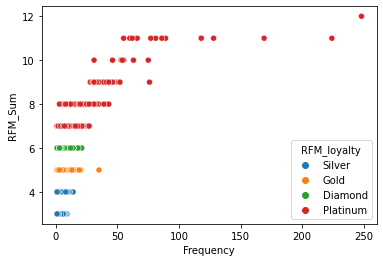

In [101]:
sns.scatterplot (data = RFM_score, x = 'Frequency', y = 'RFM_Sum', hue = 'RFM_loyalty')

<AxesSubplot:xlabel='Monetary', ylabel='RFM_Sum'>

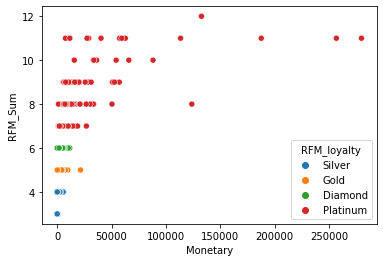

In [102]:
sns.scatterplot (data = RFM_score, x = 'Monetary', y = 'RFM_Sum', hue = 'RFM_loyalty')

<AxesSubplot:xlabel='Recency', ylabel='RFM_Sum'>

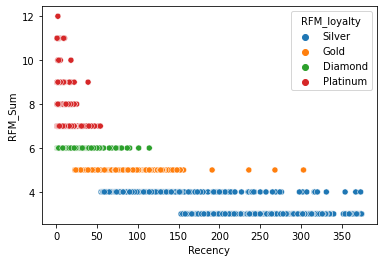

In [103]:
sns.scatterplot (data = RFM_score, x = 'Recency', y = 'RFM_Sum', hue = 'RFM_loyalty')

In [104]:
# Customer Segment descriptions:
# 1. Inactive or Passerby customers - Customers who are not after anything in particular. only buy what might catch
#                           their attention.
# 2. promising or Loyal customers - customers who shop regularly and love this shopping mall
# 3. New customers - customers who enjoy their last visit to shop and may come back if they find out more
#                    about what this mall has to offer
# 4. Out-of-town customers or sleeping  - They were once loyal customers, but they move to new place and find a closer
#                            shopping mall
# 5. Students - Customers who visit the store often but they dont spend much
# 6. Cant loose or Dissatisfied customers - They spend a lot on shopping, but the previous purchase didnt suit them
# 7. Nurture or Soon-to-be loyal customers - they are 'soon-to-be' loyal customers if the previous purchase suited them
#                                 and the mall catches their attention

In [106]:
seg_map={
    r'[1][1-2][2-3]':"Inactive or Passerby customers ",
    r'[1-2][1-3][3]':"at-Risk",
    r'[1-2][1-4][3-4]':"cant_lose",
    r'[1][1-4][2-4]':"about_to_sleep",
    #r'[3][3][3]':"need_attention",
    r'[3-4][3-4][2-4]':"promising",
    r'[1-2][1-4][1-2]':"new customer",
    r'[3-4][[1-4][1]':'students',
    r'[3-4][[1-2][1-2]':'Nurture',
    r'[3-4][[1-2][3-4]': 'Drive_Loyality',
    }

RFM_score["Segment"]=RFM_score["RFM_ID"].replace(seg_map,regex=True)
RFM_score['Segment'].value_counts()

new customer                       1925
students                           1148
Nurture                             960
Drive_Loyality                      181
Inactive or Passerby customers       74
promising                            20
at-Risk                              11
Name: Segment, dtype: int64

In [107]:
RFM_score.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_ID,RFM_Sum,RFM_loyalty,Segment
0,12347.0,3,7,4310.00,4,1,2,412,7,Platinum,Nurture
1,12348.0,76,4,1797.24,2,1,2,212,5,Gold,new customer
2,12349.0,19,1,1757.55,4,1,2,412,7,Platinum,Nurture
3,12350.0,311,1,334.40,1,1,1,111,3,Silver,new customer
4,12352.0,37,11,1545.41,3,1,2,312,6,Diamond,Nurture


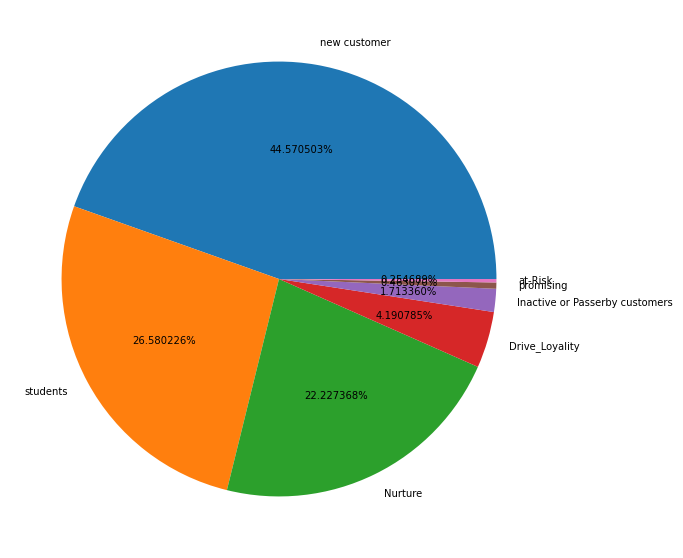

In [110]:
plt.figure (figsize = (14, 10))
plt.pie (RFM_score.Segment.value_counts(), labels = RFM_score.Segment.value_counts().index, autopct = '%2f%%')
plt.show()

### K-Means algorithm :

In [111]:
RFM_score.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_ID,RFM_Sum,RFM_loyalty,Segment
0,12347.0,3,7,4310.00,4,1,2,412,7,Platinum,Nurture
1,12348.0,76,4,1797.24,2,1,2,212,5,Gold,new customer
2,12349.0,19,1,1757.55,4,1,2,412,7,Platinum,Nurture
3,12350.0,311,1,334.40,1,1,1,111,3,Silver,new customer
4,12352.0,37,11,1545.41,3,1,2,312,6,Diamond,Nurture


In [112]:
newdata = RFM_score ['RFM_Sum']
pd.DataFrame (newdata)

,RFM_Sum
0,7
1,5
2,7
3,3
4,6
...,...
4314,3
4315,3
4316,6
4317,7


In [114]:
# applying the k-means algorithm :

from sklearn.cluster import KMeans
SSE = []
for K in range (1, 30):
    k_means = KMeans (n_clusters = K, init = 'k-means++')
    k_means.fit (pd.DataFrame (newdata))
    SSE.append (k_means.inertia_)
    

In [115]:
frame = pd.DataFrame ({'cluster' : range (1, 30), 'SSE' : SSE})

Text(0, 0.5, 'Inertia')

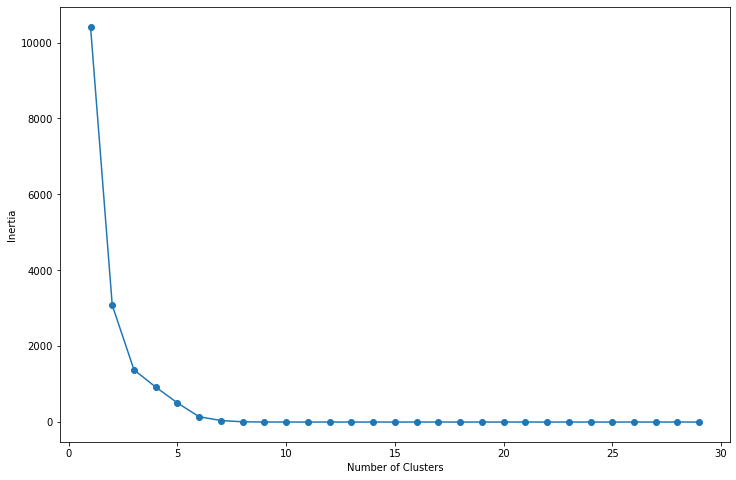

In [116]:
plt.figure (figsize = (12, 8))
plt.plot (frame ['cluster'], frame ['SSE'], marker = 'o')
plt.xlabel ('Number of Clusters')
plt.ylabel ('Inertia')

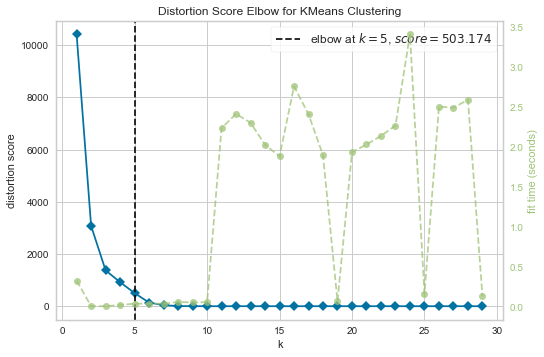

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [118]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer (model, k = (1, 30)).fit (pd.DataFrame (newdata))
visualizer.show()

In [119]:
# Fitting data using k-means algorithm :
km = KMeans (n_clusters = 4, init = 'k-means++', max_iter = 100, random_state = 101)
y_km = km.fit_predict (pd.DataFrame(newdata))
y_km

array([1, 0, 1, ..., 3, 1, 3])

In [120]:
RFM_score ['Cluster'] = km.labels_
RFM_score.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_ID,RFM_Sum,RFM_loyalty,Segment,Cluster
0,12347.0,3,7,4310.00,4,1,2,412,7,Platinum,Nurture,1
1,12348.0,76,4,1797.24,2,1,2,212,5,Gold,new customer,0
2,12349.0,19,1,1757.55,4,1,2,412,7,Platinum,Nurture,1
3,12350.0,311,1,334.40,1,1,1,111,3,Silver,new customer,2
4,12352.0,37,11,1545.41,3,1,2,312,6,Diamond,Nurture,3


In [121]:
RFM_score ['Cluster'].value_counts()

0    1676
2     929
3     890
1     824
Name: Cluster, dtype: int64

<AxesSubplot:xlabel='Frequency', ylabel='RFM_Sum'>

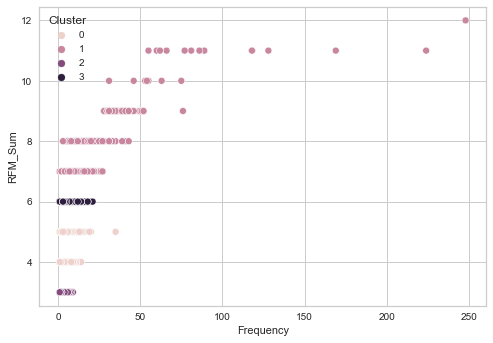

In [123]:
sns.scatterplot (data = RFM_score, x = 'Frequency', y = 'RFM_Sum', hue = 'Cluster')